In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
df= pd.read_csv('/content/drive/My Drive/SDP/crime_bigdata_sdp.csv')

In [ ]:
df.head()

Unnamed: 0                                        Description      Genre
0           0  Andreas Dresen's adaptation of Clemens Meyer's...  Non Crime
1           1  Norah Larkin is a single woman whose heart is ...      Crime
2           2  Angela, a corporate climber, gets stuck workin...  Non Crime
3           3  Commissaire Edouard Coleman is a Paris police ...      Crime
4           4  The world is shocked by the appearance of two ...  Non Crime

In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df.head()

Description      Genre
0  Andreas Dresen's adaptation of Clemens Meyer's...  Non Crime
1  Norah Larkin is a single woman whose heart is ...      Crime
2  Angela, a corporate climber, gets stuck workin...  Non Crime
3  Commissaire Edouard Coleman is a Paris police ...      Crime
4  The world is shocked by the appearance of two ...  Non Crime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  8536 non-null   object
 1   Genre        8536 non-null   object
dtypes: object(2)
memory usage: 133.5+ KB


In [ ]:
import nltk
nltk.download()
nltk.download('punkt')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
#from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
!python -m textblob.download_corpora

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Description'][i])
    review = review.lower()
    review = TextBlob(review)
    review= review.correct()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['andrew dresden adaptation clement meyer novel group east german friend right fall wall',
 'north margin single woman whose heart broken receiving dear john letter night drinking pass apartment womanish harry preble waking find accused murder',
 'angela corporate climber get stuck working late christmas eve find target unhinged security guard help sight woman must overcome physical psychological challenge survive',
 'commissary edward column paris police chief whose life investigation violent crime left despondent beginning affair beautiful cold woman named city befriend boyfriend simon local nightclub owner unbeknownst edward however simon also ruthless bank robber drug smuggler planning one final edward forced pursue simon learning true identity',
 'world shocked appearance two talking chimpanzee arrived mysteriously u statecraft become toast society one man belief threat human race',
 'two poor greater johnny ponyboy assaulted vicious gang son johnny kill one attacker tension begin

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(corpus, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
y=pd.get_dummies(df['Genre'])

In [ ]:
y


Crime  Non Crime
0         0          1
1         1          0
2         0          1
3         1          0
4         0          1
...     ...        ...
8531      0          1
8532      0          1
8533      0          1
8534      1          0
8535      0          1

[8536 rows x 2 columns]

In [ ]:
y=y.iloc[:,1].values

In [1]:
import pickle

pickle_in = open("/content/drive/My Drive/SDP/X.pickle","rb")
corpus = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/SDP/y.pickle","rb")
y = pickle.load(pickle_in)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()
pickle.dump(cv, open('/content/drive/My Drive/SDP/tranform.pkl', 'wb'))

#### Multinomial Naive Bayes

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier


from sklearn.naive_bayes import MultinomialNB
crime_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=crime_detect_model.predict(X_test)



In [6]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)

In [7]:
confusion_m

array([[726, 137],
       [230, 615]])

In [8]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [9]:
accuracy

0.7851288056206089

In [10]:
from sklearn.metrics import classification_report
lr_tfidf_report=classification_report(y_test,y_pred,target_names=['Crime','Non-Crime'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

       Crime       0.76      0.84      0.80       863
   Non-Crime       0.82      0.73      0.77       845

    accuracy                           0.79      1708
   macro avg       0.79      0.78      0.78      1708
weighted avg       0.79      0.79      0.78      1708



In [13]:
filename = '/content/drive/My Drive/SDP/nlp_crime_model_test.pkl'
pickle.dump(crime_detect_model, open(filename, 'wb'))

One of best acc


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# print(train_x)
gnb.fit(X_train, y_train)
gnb.predict(X_test)
gnb.score(X_test,y_test)

0.6176814988290398

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dec= DecisionTreeClassifier(random_state=0)

clf_dec.fit(X_train, y_train)

clf_dec.predict(X_test)

clf_dec.score(X_test,y_test)

0.7125292740046838

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_log= LogisticRegression(random_state=0)

clf_log.fit(X_train, y_train)

clf_log.predict(X_test)

clf_log.score(X_test,y_test)

0.7716627634660421

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=300, random_state=0)

clf_rf.fit(X_train, y_train)

clf_rf.predict(X_test)

clf_rf.score(X_test,y_test)

0.7822014051522248

In [ ]:
import pickle

pickle_in = open("/content/drive/My Drive/SDP/X.pickle","rb")
corpus = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/SDP/y.pickle","rb")
y = pickle.load(pickle_in)

# Using Word Vectors

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy

In [ ]:
import en_core_web_md
nlp = en_core_web_md.load()

In [ ]:
train=corpus[:6828]
train

['andrew dresden adaptation clement meyer novel group east german friend right fall wall',
 'north margin single woman whose heart broken receiving dear john letter night drinking pass apartment womanish harry preble waking find accused murder',
 'angela corporate climber get stuck working late christmas eve find target unhinged security guard help sight woman must overcome physical psychological challenge survive',
 'commissary edward column paris police chief whose life investigation violent crime left despondent beginning affair beautiful cold woman named city befriend boyfriend simon local nightclub owner unbeknownst edward however simon also ruthless bank robber drug smuggler planning one final edward forced pursue simon learning true identity',
 'world shocked appearance two talking chimpanzee arrived mysteriously u statecraft become toast society one man belief threat human race',
 'two poor greater johnny ponyboy assaulted vicious gang son johnny kill one attacker tension begin

In [ ]:
train_x=corpus[:6828]
train_y=y[:6828]
test_x=corpus[6828:]
test_y=y[6828:]

In [ ]:
print(train_x)
print(train_y)

print(train_x[0])
print(train_y[0])

print(test_x)
print(test_y)

['andrew dresden adaptation clement meyer novel group east german friend right fall wall', 'north margin single woman whose heart broken receiving dear john letter night drinking pass apartment womanish harry preble waking find accused murder', 'angela corporate climber get stuck working late christmas eve find target unhinged security guard help sight woman must overcome physical psychological challenge survive', 'commissary edward column paris police chief whose life investigation violent crime left despondent beginning affair beautiful cold woman named city befriend boyfriend simon local nightclub owner unbeknownst edward however simon also ruthless bank robber drug smuggler planning one final edward forced pursue simon learning true identity', 'world shocked appearance two talking chimpanzee arrived mysteriously u statecraft become toast society one man belief threat human race', 'two poor greater johnny ponyboy assaulted vicious gang son johnny kill one attacker tension begin moun

In [ ]:
train_X=train_x
train_Y=train_y
test_X=test_x
test_Y=test_y

In [ ]:
print(type(train_X))

<class 'list'>


In [ ]:
docs = [nlp(text) for text in train_X]
train_x_word_vectors = [x.vector for x in docs]

In [ ]:
test_docs = [nlp(text) for text in test_X]
test_x_word_vectors =  [x.vector for x in test_docs]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dec_wv= DecisionTreeClassifier(random_state=0)

clf_dec_wv.fit(train_x_word_vectors, train_Y)

clf_dec_wv.predict(test_x_word_vectors)

clf_dec_wv.score(test_x_word_vectors,test_Y)

0.6451990632318502

In [ ]:
from sklearn import svm

clf_svm_wv = svm.SVC(kernel='linear')
clf_svm_wv.fit(train_x_word_vectors, train_Y)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
test_docs = [nlp(text) for text in test_X]
test_x_word_vectors =  [x.vector for x in test_docs]

clf_svm_wv.predict(test_x_word_vectors)

array([1, 1, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
clf_svm_wv.score(test_x_word_vectors,test_Y)

0.7710772833723654

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_wv = GaussianNB()

# print(train_x)
gnb_wv.fit(train_x_word_vectors, train_Y)
gnb_wv.predict(test_x_word_vectors)
gnb_wv.score(test_x_word_vectors,test_Y)

0.7576112412177985

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_log_wv= LogisticRegression(random_state=0)

clf_log_wv.fit(train_x_word_vectors, train_Y)

clf_log_wv.predict(test_x_word_vectors)

clf_log_wv.score(test_x_word_vectors,test_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7798594847775175

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf_wv = RandomForestClassifier(n_estimators=400, random_state=0)

clf_rf_wv.fit(train_x_word_vectors, train_Y)

clf_rf_wv.predict(test_x_word_vectors)

clf_rf_wv.score(test_x_word_vectors,test_Y)

0.7599531615925058

In [ ]:
corpus

['andrew dresden adaptation clement meyer novel group east german friend right fall wall',
 'north margin single woman whose heart broken receiving dear john letter night drinking pass apartment womanish harry preble waking find accused murder',
 'angela corporate climber get stuck working late christmas eve find target unhinged security guard help sight woman must overcome physical psychological challenge survive',
 'commissary edward column paris police chief whose life investigation violent crime left despondent beginning affair beautiful cold woman named city befriend boyfriend simon local nightclub owner unbeknownst edward however simon also ruthless bank robber drug smuggler planning one final edward forced pursue simon learning true identity',
 'world shocked appearance two talking chimpanzee arrived mysteriously u statecraft become toast society one man belief threat human race',
 'two poor greater johnny ponyboy assaulted vicious gang son johnny kill one attacker tension begin

# USING RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

In [ ]:
voc_size=100000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[87999,
  27791,
  53440,
  47159,
  21342,
  70220,
  68745,
  68071,
  13827,
  1858,
  86810,
  67169,
  9077],
 [9701,
  58224,
  66938,
  10390,
  33411,
  39362,
  25229,
  6470,
  90271,
  37130,
  7364,
  81770,
  82391,
  87155,
  52145,
  53843,
  49845,
  15555,
  63804,
  20426,
  85556,
  73023],
 [73344,
  9053,
  49109,
  8936,
  24136,
  76934,
  35780,
  44227,
  69109,
  20426,
  75154,
  45086,
  74563,
  23332,
  68672,
  48774,
  10390,
  20443,
  25805,
  9796,
  1047,
  85759,
  33994],
 [58648,
  31895,
  22263,
  71996,
  84055,
  35199,
  33411,
  59423,
  37249,
  31567,
  16739,
  57656,
  67574,
  47874,
  82944,
  49867,
  22459,
  10390,
  78870,
  64613,
  71636,
  31399,
  34113,
  31393,
  61751,
  89894,
  64402,
  31895,
  95765,
  34113,
  38371,
  3255,
  20110,
  14353,
  83128,
  33116,
  3657,
  24343,
  95356,
  31895,
  98186,
  6505,
  34113,
  36027,
  70476,
  85498],
 [3906,
  64077,
  6409,
  1509,
  35339,
  45675,
  7618,
  67482,
  19

In [ ]:
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ... 86810 67169  9077]
 [    0     0     0 ... 20426 85556 73023]
 [    0     0     0 ...  1047 85759 33994]
 ...
 [    0     0     0 ... 91910 59423 64613]
 [    0     0     0 ... 28754 86995 52855]
 [    0     0     0 ... 59081 95170 66593]]


In [ ]:
embedded_docs[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
embedding_vector_features=1000
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 1000)         100000000 
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 200, 32)           33056     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 100,035,169
Trainable params: 100,035,169
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=48, epochs=10)

Epoch 1/10
134/134 [==============================] - 159s 1s/step - loss: 0.5866 - accuracy: 0.6843 - val_loss: 0.5229 - val_accuracy: 0.7573
Epoch 2/10
134/134 [==============================] - 157s 1s/step - loss: 0.1601 - accuracy: 0.9441 - val_loss: 0.7797 - val_accuracy: 0.6846
Epoch 3/10
134/134 [==============================] - 157s 1s/step - loss: 0.0254 - accuracy: 0.9942 - val_loss: 0.9320 - val_accuracy: 0.6917
Epoch 4/10
134/134 [==============================] - 157s 1s/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 1.0173 - val_accuracy: 0.6926
Epoch 5/10
134/134 [==============================] - 156s 1s/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 1.0699 - val_accuracy: 0.6968
Epoch 6/10
134/134 [==============================] - 157s 1s/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 1.1134 - val_accuracy: 0.6888
Epoch 7/10
134/134 [==============================] - 158s 1s/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 1.1461 - val_accuracy: 0.6968

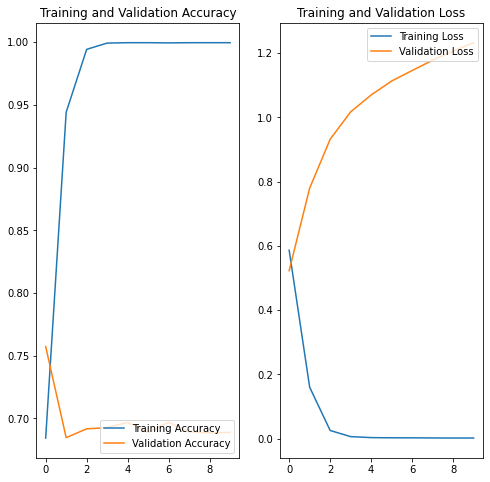

In [ ]:
import matplotlib.pyplot as plt

epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
 from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=1000
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(SimpleRNN(64),return_sequences=True)
model1.add(Dropout(0.3))
model1.add(SimpleRNN(64),return_sequences=False)
#model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

ValueError: ignored

In [ ]:
history1= model1.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=48, epochs=10)

Epoch 1/10
134/134 [==============================] - 24s 178ms/step - loss: 0.6880 - accuracy: 0.5384 - val_loss: 0.6466 - val_accuracy: 0.6256
Epoch 2/10
134/134 [==============================] - 24s 177ms/step - loss: 0.2905 - accuracy: 0.8953 - val_loss: 0.7536 - val_accuracy: 0.6256
Epoch 3/10
134/134 [==============================] - 24s 178ms/step - loss: 0.0367 - accuracy: 0.9941 - val_loss: 0.9676 - val_accuracy: 0.6111
Epoch 4/10
134/134 [==============================] - 24s 176ms/step - loss: 0.0070 - accuracy: 0.9992 - val_loss: 0.9975 - val_accuracy: 0.6298
Epoch 5/10
134/134 [==============================] - 23s 173ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 1.0409 - val_accuracy: 0.6373
Epoch 6/10
134/134 [==============================] - 23s 173ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 1.1183 - val_accuracy: 0.6162
Epoch 7/10
134/134 [==============================] - 23s 174ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 1.1682 - val_ac

In [ ]:
import matplotlib.pyplot as plt

epochs=10
acc = history1.history1['accuracy']
val_acc = history1.history1['val_accuracy']

loss=history1.history1['loss']
val_loss=history1.history1['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6110590440487348

In [ ]:
import pickle

pickle_in = open("/content/drive/My Drive/SDP/X.pickle","rb")
corpus = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/SDP/y.pickle","rb")
y = pickle.load(pickle_in)

# Using Word Vectors

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy

In [ ]:
import en_core_web_md
nlp = en_core_web_md.load()

In [ ]:
train=corpus[:6828]
train

['andrew dresden adaptation clement meyer novel group east german friend right fall wall',
 'north margin single woman whose heart broken receiving dear john letter night drinking pass apartment womanish harry preble waking find accused murder',
 'angela corporate climber get stuck working late christmas eve find target unhinged security guard help sight woman must overcome physical psychological challenge survive',
 'commissary edward column paris police chief whose life investigation violent crime left despondent beginning affair beautiful cold woman named city befriend boyfriend simon local nightclub owner unbeknownst edward however simon also ruthless bank robber drug smuggler planning one final edward forced pursue simon learning true identity',
 'world shocked appearance two talking chimpanzee arrived mysteriously u statecraft become toast society one man belief threat human race',
 'two poor greater johnny ponyboy assaulted vicious gang son johnny kill one attacker tension begin

In [ ]:
train_x=corpus[:6828]
train_y=y[:6828]
test_x=corpus[6828:]
test_y=y[6828:]

In [ ]:
print(train_x)
print(train_y)

print(train_x[0])
print(train_y[0])

print(test_x)
print(test_y)

['andrew dresden adaptation clement meyer novel group east german friend right fall wall', 'north margin single woman whose heart broken receiving dear john letter night drinking pass apartment womanish harry preble waking find accused murder', 'angela corporate climber get stuck working late christmas eve find target unhinged security guard help sight woman must overcome physical psychological challenge survive', 'commissary edward column paris police chief whose life investigation violent crime left despondent beginning affair beautiful cold woman named city befriend boyfriend simon local nightclub owner unbeknownst edward however simon also ruthless bank robber drug smuggler planning one final edward forced pursue simon learning true identity', 'world shocked appearance two talking chimpanzee arrived mysteriously u statecraft become toast society one man belief threat human race', 'two poor greater johnny ponyboy assaulted vicious gang son johnny kill one attacker tension begin moun

In [ ]:
train_X=train_x
train_Y=train_y
test_X=test_x
test_Y=test_y

## Using LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size=100000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[37942,
  17661,
  39917,
  31486,
  16700,
  8500,
  35214,
  38925,
  59151,
  82185,
  50456,
  40794,
  17390],
 [49186,
  51343,
  24876,
  75859,
  55193,
  65211,
  67860,
  13508,
  94102,
  2385,
  57387,
  21573,
  47076,
  81622,
  16361,
  81677,
  28584,
  18872,
  68511,
  97379,
  39507,
  72795],
 [71120,
  48515,
  80612,
  54078,
  30415,
  3082,
  96195,
  17687,
  9908,
  97379,
  30514,
  64191,
  24772,
  7269,
  55689,
  64982,
  75859,
  22574,
  18681,
  17357,
  77361,
  38133,
  31538],
 [59397,
  2631,
  17744,
  40728,
  88455,
  90506,
  55193,
  63614,
  10485,
  2361,
  19400,
  6111,
  67489,
  23556,
  22997,
  11832,
  27485,
  75859,
  61377,
  69907,
  66610,
  1885,
  39858,
  42364,
  90478,
  851,
  43557,
  2631,
  50033,
  39858,
  94742,
  49438,
  22546,
  1887,
  18916,
  33151,
  1154,
  96214,
  92385,
  2631,
  11476,
  70106,
  39858,
  22411,
  94580,
  50717],
 [38228,
  83018,
  14059,
  98478,
  97807,
  65367,
  78076,
  14966,
  4

In [ ]:
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)


[[    0     0     0 ... 50456 40794 17390]
 [    0     0     0 ... 97379 39507 72795]
 [    0     0     0 ... 77361 38133 31538]
 ...
 [    0     0     0 ... 80459 63614 69907]
 [    0     0     0 ...  6677 20234  1539]
 [    0     0     0 ... 10869 99940 95916]]


In [ ]:
embedded_docs[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
embedding_vector_features=1000
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(50))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 1000)         100000000 
_________________________________________________________________
lstm (LSTM)                  (None, 50)                210200    
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 100,210,251
Trainable params: 100,210,251
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(8536, (8536,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((8536, 200), (8536,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64, epochs=10)

Epoch 1/10
101/101 [==============================] - 49s 486ms/step - loss: 0.5713 - accuracy: 0.7087 - val_loss: 0.4873 - val_accuracy: 0.7830
Epoch 2/10
101/101 [==============================] - 48s 480ms/step - loss: 0.2829 - accuracy: 0.8949 - val_loss: 0.5706 - val_accuracy: 0.7437
Epoch 3/10
101/101 [==============================] - 48s 477ms/step - loss: 0.1307 - accuracy: 0.9552 - val_loss: 0.7218 - val_accuracy: 0.7273
Epoch 4/10
101/101 [==============================] - 48s 479ms/step - loss: 0.0568 - accuracy: 0.9836 - val_loss: 0.9750 - val_accuracy: 0.7324
Epoch 5/10
101/101 [==============================] - 48s 480ms/step - loss: 0.0274 - accuracy: 0.9925 - val_loss: 1.0689 - val_accuracy: 0.7081
Epoch 6/10
101/101 [==============================] - 48s 479ms/step - loss: 0.0327 - accuracy: 0.9905 - val_loss: 1.2719 - val_accuracy: 0.7151
Epoch 7/10
101/101 [==============================] - 48s 480ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 1.1705 - val_ac

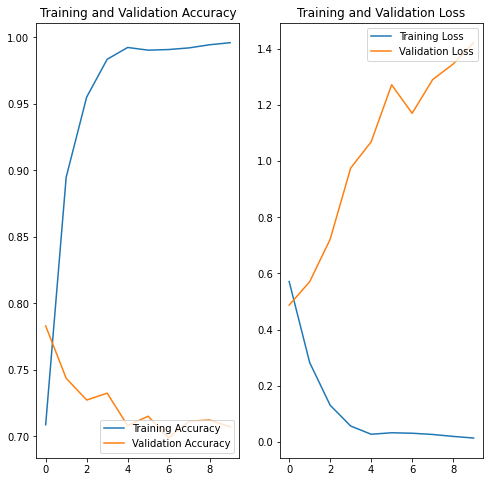

In [ ]:
import matplotlib.pyplot as plt

epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
embedding_vector_features=1000
model0=Sequential()
model0.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model0.add(LSTM(10, return_sequences=True))
model0.add(LSTM(10, return_sequences=False))
model0.add(Dense(1,activation='sigmoid'))
model0.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model0.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 1000)         100000000 
_________________________________________________________________
lstm (LSTM)                  (None, 200, 10)           40440     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 100,041,291
Trainable params: 100,041,291
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history0 = model0.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=250, epochs=10)

Epoch 1/10
26/26 [==============================] - 25s 975ms/step - loss: 0.6643 - accuracy: 0.6695 - val_loss: 0.6029 - val_accuracy: 0.7493
Epoch 2/10
26/26 [==============================] - 25s 943ms/step - loss: 0.4732 - accuracy: 0.8405 - val_loss: 0.5154 - val_accuracy: 0.7605
Epoch 3/10
26/26 [==============================] - 24s 934ms/step - loss: 0.2953 - accuracy: 0.9138 - val_loss: 0.5641 - val_accuracy: 0.7498
Epoch 4/10
26/26 [==============================] - 24s 931ms/step - loss: 0.1892 - accuracy: 0.9541 - val_loss: 0.6492 - val_accuracy: 0.7320
Epoch 5/10
26/26 [==============================] - 24s 937ms/step - loss: 0.1304 - accuracy: 0.9720 - val_loss: 0.7187 - val_accuracy: 0.7245
Epoch 6/10
26/26 [==============================] - 24s 928ms/step - loss: 0.1016 - accuracy: 0.9800 - val_loss: 0.7899 - val_accuracy: 0.7142
Epoch 7/10
26/26 [==============================] - 24s 927ms/step - loss: 0.0782 - accuracy: 0.9850 - val_loss: 0.8641 - val_accuracy: 0.7146

# BEST NEXT

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=500
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(LSTM(10, return_sequences=True))
model1.add(LSTM(10, return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:

model1.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=500,epochs=5)

Epoch 1/5
13/13 [==============================] - 8s 590ms/step - loss: 0.6607 - accuracy: 0.7515 - val_loss: 0.6410 - val_accuracy: 0.7273
Epoch 2/5
13/13 [==============================] - 7s 545ms/step - loss: 0.5524 - accuracy: 0.8307 - val_loss: 0.5547 - val_accuracy: 0.7498
Epoch 3/5
13/13 [==============================] - 7s 536ms/step - loss: 0.4047 - accuracy: 0.8735 - val_loss: 0.5114 - val_accuracy: 0.7685
Epoch 4/5
13/13 [==============================] - 7s 529ms/step - loss: 0.2879 - accuracy: 0.9136 - val_loss: 0.5596 - val_accuracy: 0.7343
Epoch 5/5
13/13 [==============================] - 7s 537ms/step - loss: 0.2042 - accuracy: 0.9522 - val_loss: 0.6118 - val_accuracy: 0.7277


In [ ]:
y_pred1=model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[756, 313],
       [268, 797]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7277413308341143

# Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
## Creating model
embedding_vector_features=1000
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model2.add(Bidirectional(LSTM(10,return_sequences=True)))
model2.add(Bidirectional(LSTM(10,return_sequences=False)))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 1000)         100000000 
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 20)           80880     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20)                2480      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 100,083,381
Trainable params: 100,083,381
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=100,epochs=5)

Epoch 1/5
65/65 [==============================] - 65s 1s/step - loss: 0.6191 - accuracy: 0.6745 - val_loss: 0.5062 - val_accuracy: 0.7713
Epoch 2/5
65/65 [==============================] - 62s 959ms/step - loss: 0.3823 - accuracy: 0.8582 - val_loss: 0.5443 - val_accuracy: 0.7516
Epoch 3/5
65/65 [==============================] - 63s 962ms/step - loss: 0.2307 - accuracy: 0.9350 - val_loss: 0.6675 - val_accuracy: 0.7184
Epoch 4/5
65/65 [==============================] - 63s 967ms/step - loss: 0.1531 - accuracy: 0.9630 - val_loss: 0.7253 - val_accuracy: 0.7240
Epoch 5/5
65/65 [==============================] - 62s 959ms/step - loss: 0.1002 - accuracy: 0.9789 - val_loss: 0.8038 - val_accuracy: 0.7226


In [ ]:
y_pred2=model2.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred2)

array([[755, 314],
       [278, 787]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7225866916588566

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1069
           1       0.71      0.74      0.73      1065

    accuracy                           0.72      2134
   macro avg       0.72      0.72      0.72      2134
weighted avg       0.72      0.72      0.72      2134



In [ ]:
## Creating model
embedding_vector_features=1000
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(10,return_sequences=True)))

model2.add(Bidirectional(LSTM(10,return_sequences=False)))

model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 500)          50000000  
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 500)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 200, 100)          220400    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 50,280,901
Trainable params: 50,280,901
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=100,epochs=5)

Epoch 1/5
 2/65 [..............................] - ETA: 15s - loss: 0.7024 - accuracy: 0.4450

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred2)

array([[755, 314],
       [278, 787]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7216494845360825

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1069
           1       0.72      0.72      0.72      1065

    accuracy                           0.72      2134
   macro avg       0.72      0.72      0.72      2134
weighted avg       0.72      0.72      0.72      2134



# THE END